In [11]:
# Imports
import numpy as np
import os
from typing import List
import matplotlib.pyplot as plt
import re

# # Function to clean tokens
# def clean_tokens(tokens: List[str]) -> List[str]:
#     tokens = [t.replace(" ", "") for t in tokens]
#     return tokens

def clean_tokens(tokens: List[str]) -> List[str]:
    # Use regular expressions to remove special characters and punctuation
    cleaned_tokens = [re.sub(r'[^\w\s]', '', t) for t in tokens]
    print("cleaned_tokens 1: ",cleaned_tokens)
    # Remove empty tokens that may result from the cleaning process
    cleaned_tokens = [t for t in cleaned_tokens if t]
    print("cleaned token 2 :", cleaned_tokens)
    return cleaned_tokens


# Function to load file content
def load_file(file: str) -> str:
    with open(file) as f:
        return f.read()

# Function to get tokens from a string
def tokens_for_string(s: str) -> List[str]:
    print("input : ",s.split())
    return clean_tokens(s.split())


selected_example_text = "/content/data.txt"  # Change this to select different text
source_text = load_file(selected_example_text)

# Generate tokens
tokens = tokens_for_string(source_text)

# Display the first 10 tokens
print("First 50 tokens:", tokens[:50])


input :  ['[', '{', '"question":', '"How', 'can', 'I', 'manage', 'my', 'anger', 'effectively?",', '"context":', '"Managing', 'anger', 'effectively', 'involves', 'recognizing', 'triggers,', 'practicing', 'relaxation', 'techniques,', 'and', 'communicating', 'assertively', 'rather', 'than', 'aggressively.",', '"answers":', '[', '{"text":', '"recognizing', 'triggers,', 'practicing', 'relaxation', 'techniques,', 'and', 'communicating', 'assertively', 'rather', 'than', 'aggressively",', '"start":', '50,', '"end":', '140}', ']', '},', '{', '"question":', '"What', 'are', 'some', 'ways', 'to', 'deal', 'with', 'grief?",', '"context":', '"Dealing', 'with', 'grief', 'can', 'include', 'allowing', 'yourself', 'to', 'mourn,', 'seeking', 'support', 'from', 'others,', 'and', 'finding', 'ways', 'to', 'remember', 'and', 'honor', 'your', 'loved', 'one.",', '"answers":', '[', '{"text":', '"allowing', 'yourself', 'to', 'mourn,', 'seeking', 'support', 'from', 'others,', 'and', 'finding', 'ways', 'to', 'remem

In [19]:
# Function to calculate the transition matrix
def calculate_transition_matrix(tokens: List[str]) -> np.ndarray:
    unique_tokens = list(set(tokens))
    print("unique_tokens : ",unique_tokens)
    unique_word_combination_counts = {}
    print("unique_word_combination_counts : ",unique_word_combination_counts)
    total_froms = {}

    transition_matrix = np.zeros((len(unique_tokens), len(unique_tokens)))
    print("transition_matrix : ",transition_matrix)

    for i, token in enumerate(tokens):
        if i < len(tokens) - 1:
            from_to = (token, tokens[i + 1])
            print("from_to : ",from_to)
            unique_word_combination_counts[from_to] = unique_word_combination_counts.get(from_to, 0) + 1
            print("unique_word_combination_counts : ",unique_word_combination_counts)
            total_froms[token] = total_froms.get(token, 0) + 1
            print("total_froms : ",total_froms)
    print("loop 2: ")
    for key, value in unique_word_combination_counts.items():
        print("key : ",key)
        print("value : ",value)
        _from, _to = key
        print("_from : ",_from)
        print("_to : ",_to)
        transition_matrix[unique_tokens.index(_from), unique_tokens.index(_to)] = value / total_froms[_from]
        print("transition_matrix : ",transition_matrix)

    return transition_matrix

# Calculate transition matrix
P_matrix = calculate_transition_matrix(tokens)

# Display the transition matrix
print("Transition Matrix shape:", P_matrix.shape)
print("Transition Matrix (first 10 rows):")
print(P_matrix[:10])


Streaming output truncated to the last 5000 lines.
_to :  effectiveness
transition_matrix :  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
key :  ('effectiveness', 'of')
value :  2
_from :  effectiveness
_to :  of
transition_matrix :  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
key :  ('of', 'each')
value :  2
_from :  of
_to :  each
transition_matrix :  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
key :  ('each', 'solution')
value :  2
_from :  each
_to :  solution
transition_matrix :  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
key :  ('solution',

In [24]:
# Function to generate text
def generate_text(tokens: List[str], length: int, P_matrix: np.ndarray, P_init: np.ndarray=None) -> str:
    # Create a list of unique tokens from the input tokens
    unique_tokens = list(set(tokens))

    # Initialize an empty list to store the generated text
    text = []

    # If initial probability distribution is provided, use it to select the first token
    if P_init is not None:
        current_token = np.random.choice(unique_tokens, p=P_init)
    else:
        # Otherwise, randomly select the first token from unique tokens
        current_token = np.random.choice(unique_tokens)

    # Append the first token to the text list
    text.append(current_token)

    # Generate the remaining tokens for the desired length
    for _ in range(length):
        # Ensure the current token is not the last token in the input tokens
        while current_token == tokens[-1]:
            current_token = np.random.choice(unique_tokens)

        # Select the next token based on the transition probabilities of the current token
        current_token = np.random.choice(unique_tokens, p=P_matrix[unique_tokens.index(current_token)])

        # Append the selected token to the text list
        text.append(current_token)

    # Return the generated text as a single string with spaces in between tokens
    return " ".join(text)

# Initialize word (optional)
initial_word = ""  # Change this to set the initial word
length = 100 # Length of the generated text

P_init = None
if initial_word:
    unique_tokens = list(set(tokens))
    print("unique_tokens:", unique_tokens)
    start_token = initial_word.split()[-1]
    print("start_token:", start_token)
    if start_token in unique_tokens:
        P_init = np.zeros(len(unique_tokens))
        P_init[unique_tokens.index(start_token)] = 1

# Generate text
generated_text = generate_text(tokens, length, P_matrix, P_init)

# Display the generated text
print("Generated text:")
print(generated_text)


Generated text:
some strategies to a friend experiencing a friend dealing with depression context If you can I feel overwhelmed by schoolwork context Managing social activities and seeking support encouraging treatment and maintaining a supervisor answers text setting clear goals celebrating progress and learning from colleagues or appearance start 50 end 141 question What are effective ways to prioritize tasks setting aside time management tools and ask for relaxation answers text take breaks and focus can control and focus can include practicing relaxation answers text evaluate your sleep habits manage stress and eliminating distractions start 55 end 142 question What are effective ways


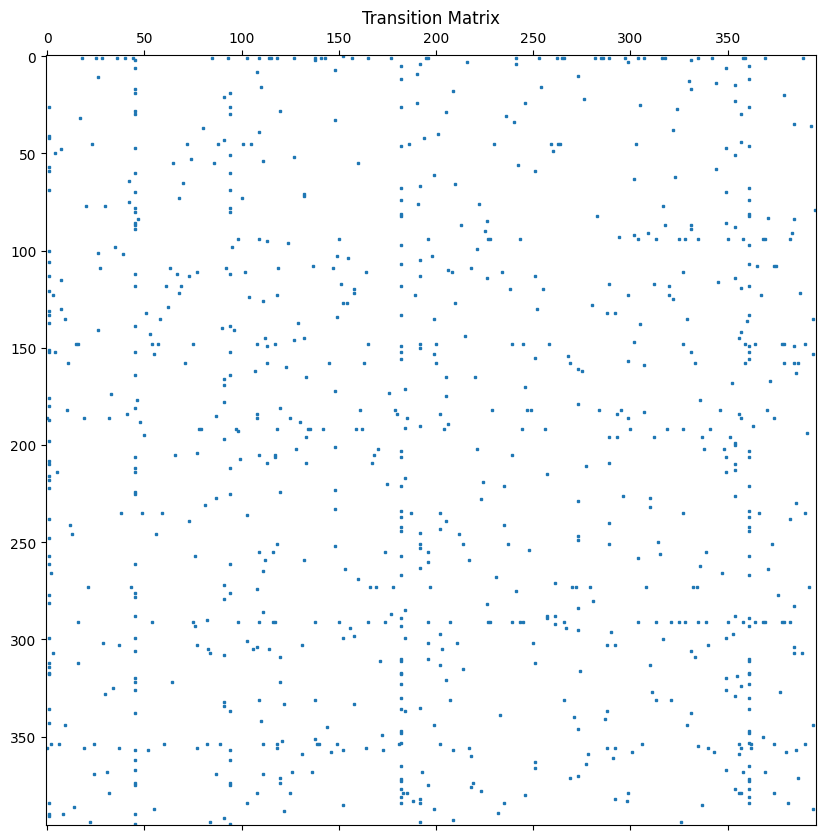

In [25]:
# Function to plot the transition matrix
def plot_transition_matrix(P_matrix: np.ndarray):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.spy(P_matrix, markersize=2)
    plt.title("Transition Matrix")
    plt.show()

# Plot the transition matrix
plot_transition_matrix(P_matrix)
